# Mobile Price Classification Using Neural Network

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Reading the dataset
data_set = pd.read_csv('train.csv')
data_set.shape

(2000, 21)

In [3]:
# Checking for null values in the dataset
data_set.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['price_range']

In [5]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1600, 20), (400, 20))

In [6]:
# Scaling the features in the training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
import keras
from keras.models import Sequential # type: ignore
from keras.layers import Input, Dense # type: ignore
from keras import optimizers

## ReLU Activation Function

In [15]:
# Designing the neural network
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(4, activation='softmax'))

In [16]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2853 - loss: 1.3918 - val_accuracy: 0.4950 - val_loss: 1.1933
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5209 - loss: 1.1111 - val_accuracy: 0.6425 - val_loss: 0.8775
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7087 - loss: 0.7796 - val_accuracy: 0.8275 - val_loss: 0.5728
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.5006 - val_accuracy: 0.8650 - val_loss: 0.4047
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9001 - loss: 0.3400 - val_accuracy: 0.8875 - val_loss: 0.3085
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9395 - loss: 0.2456 - val_accuracy: 0.9050 - val_loss: 0.2723
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9383 - loss: 0.2086 - val_accuracy: 0.9000 - val_loss: 0.2526
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.1551 - val_accuracy: 0.8950 - val_loss: 0.2

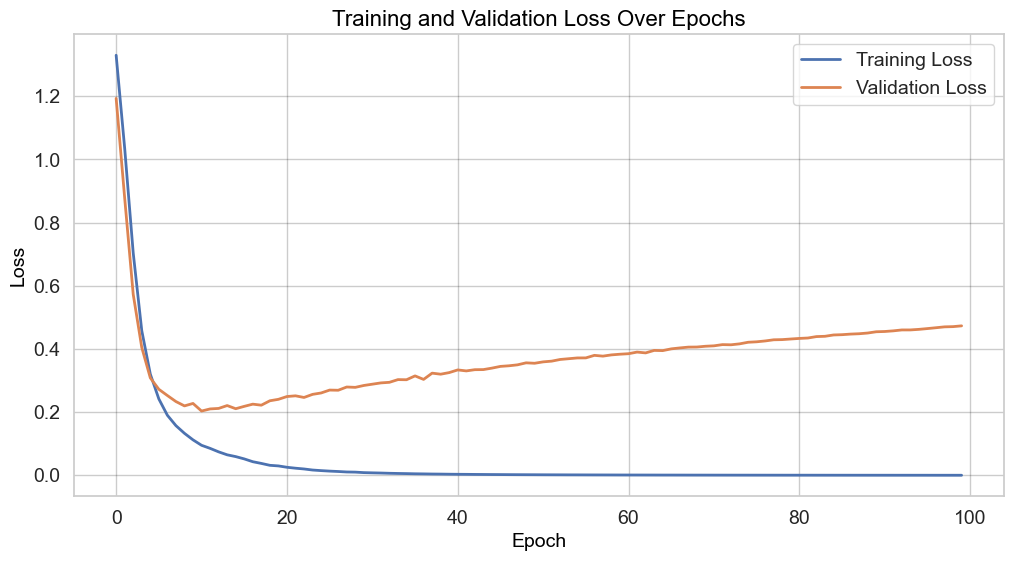

In [17]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

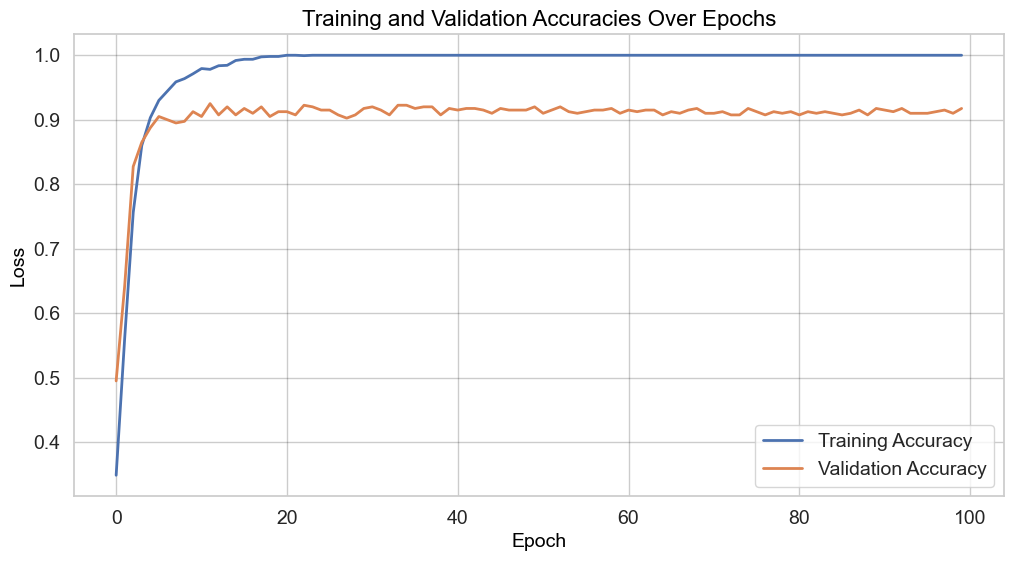

In [18]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [19]:
# Predictions for training and test sets
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [20]:
# Convert predictions to class labels
y_train_pred_classes1 = y_train_pred1.argmax(axis=1)
y_test_pred_classes1 = y_test_pred1.argmax(axis=1)

# Training metrics
train_accuracy1 = accuracy_score(y_train, y_train_pred_classes1)
train_precision1 = precision_score(y_train, y_train_pred_classes1, average='macro')
train_recall1 = recall_score(y_train, y_train_pred_classes1, average='macro')
train_f1_1 = f1_score(y_train, y_train_pred_classes1, average='macro')

# Test metrics
test_accuracy1 = accuracy_score(y_test, y_test_pred_classes1)
test_precision1 = precision_score(y_test, y_test_pred_classes1, average='macro')
test_recall1 = recall_score(y_test, y_test_pred_classes1, average='macro')
test_f1_1 = f1_score(y_test, y_test_pred_classes1, average='macro')

In [21]:
print("Training Accuracy (in %):",round(train_accuracy1*100,3))
print("Training Precision (in %):",round(train_precision1*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall1*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_1*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy1*100,3))
print("Test Precision (in %):",round(test_precision1*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall1*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_1*100,3)) # type: ignore

Training Accuracy (in %): 100.0
Training Precision (in %): 100.0
Training Recall (in %): 100.0
Training F1 Score (in %): 100.0

Test Accuracy (in %): 91.75
Test Precision (in %): 91.635
Test Recall (in %): 91.635
Test F1 Score (in %): 91.627


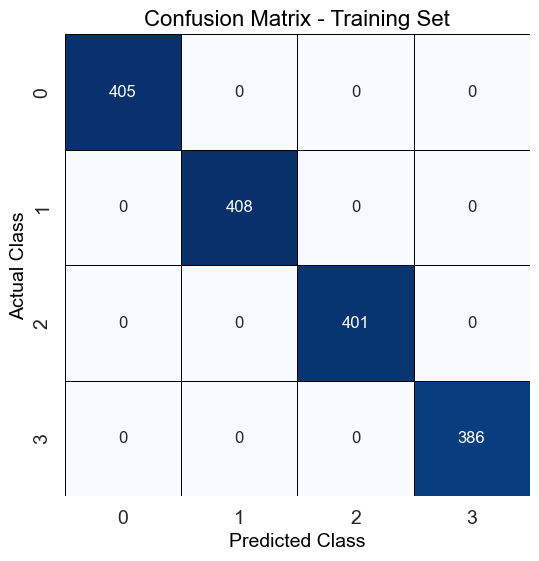

In [22]:
# Confusion matrix for training set
train_conf_matrix1 = confusion_matrix(y_train, y_train_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

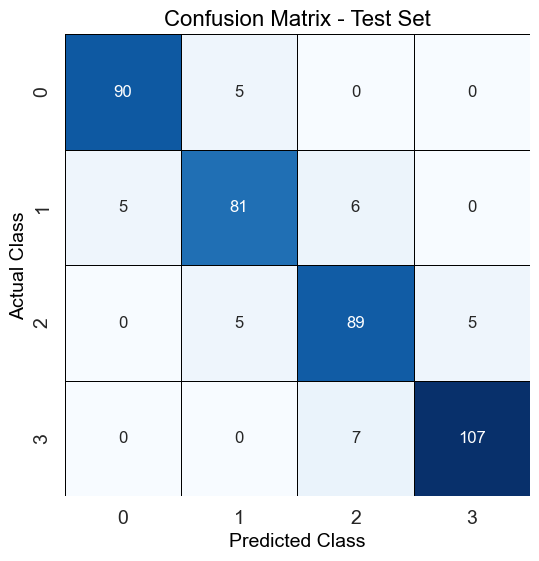

In [23]:
# Confusion matrix for test set
test_conf_matrix1 = confusion_matrix(y_test, y_test_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [24]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts1 = pd.Series(y_train_pred_classes1).value_counts().sort_index()

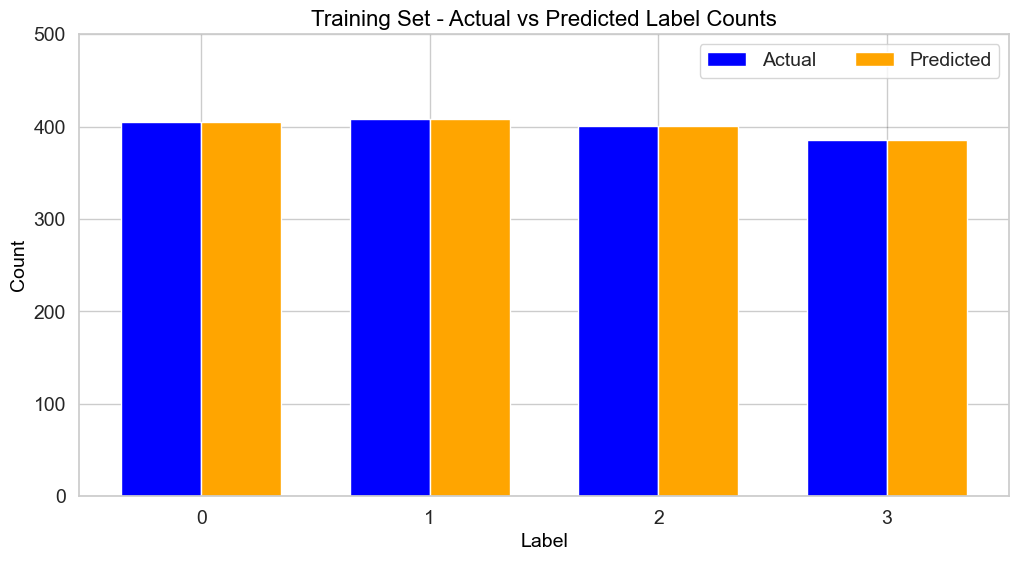

In [25]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

In [26]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts1 = pd.Series(y_test_pred_classes1).value_counts().sort_index()

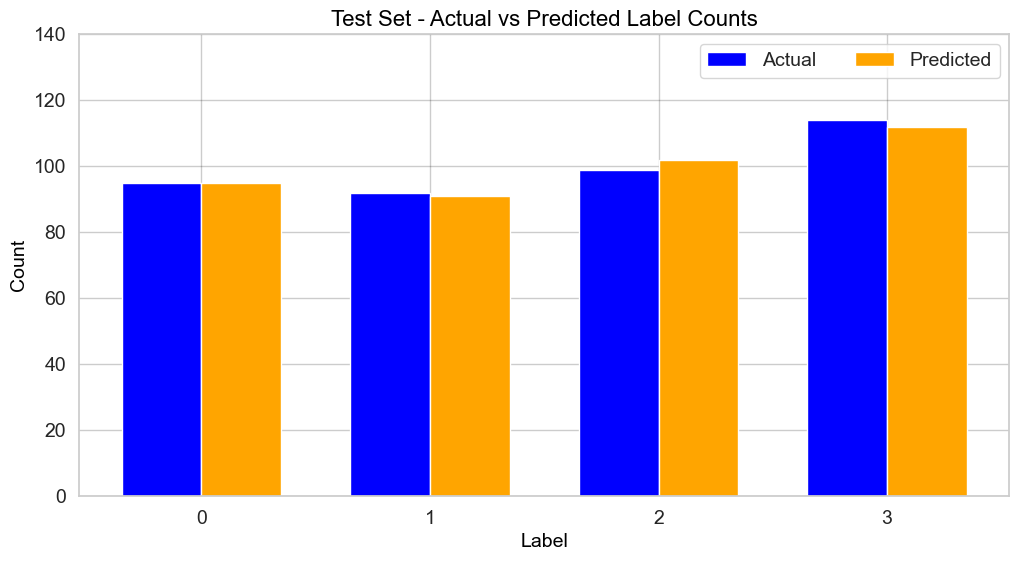

In [27]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

## Tanh Activation Function

In [28]:
# Designing the neural network
model2 = Sequential()
model2.add(Input(shape=(X_train.shape[1],)))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(16, activation='tanh'))
model2.add(Dense(4, activation='softmax'))

In [29]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4028 - loss: 1.2713 - val_accuracy: 0.6400 - val_loss: 0.9319
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.8414 - val_accuracy: 0.7350 - val_loss: 0.6761
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7624 - loss: 0.6482 - val_accuracy: 0.8225 - val_loss: 0.5358
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.4890 - val_accuracy: 0.8850 - val_loss: 0.4329
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9221 - loss: 0.3907 - val_accuracy: 0.9225 - val_loss: 0.3526
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.3217 - val_accuracy: 0.9050 - val_loss: 0.3020
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.2577 - val_accuracy: 0.9200 - val_loss: 0.2656
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9576 - loss: 0.2158 - val_accuracy: 0.9400 - val_loss: 0.2

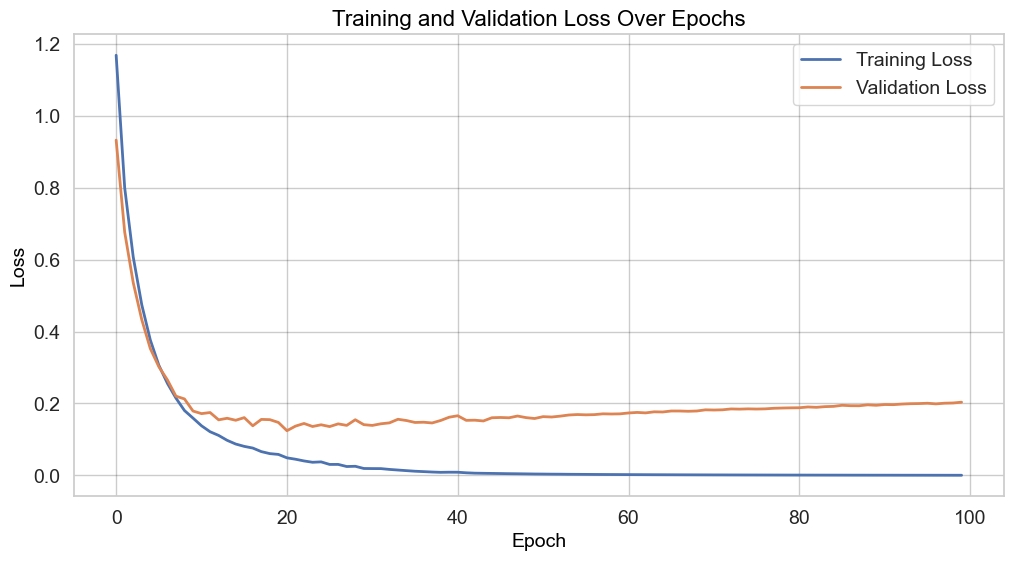

In [30]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

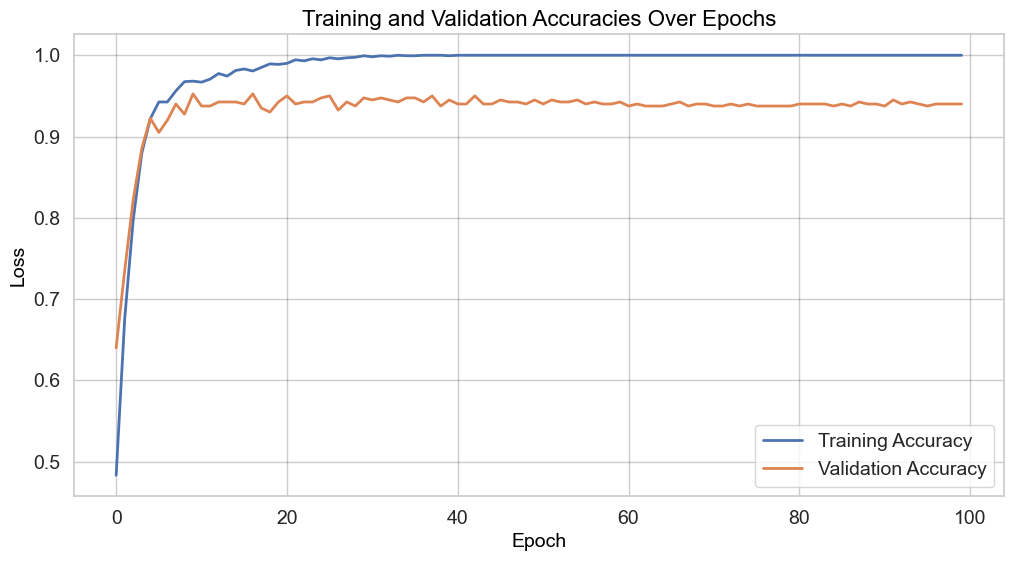

In [31]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [32]:
# Predictions for training and test sets
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [33]:
# Convert predictions to class labels
y_train_pred_classes2 = y_train_pred2.argmax(axis=1)
y_test_pred_classes2 = y_test_pred2.argmax(axis=1)

# Training metrics
train_accuracy2 = accuracy_score(y_train, y_train_pred_classes2)
train_precision2 = precision_score(y_train, y_train_pred_classes2, average='macro')
train_recall2 = recall_score(y_train, y_train_pred_classes2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred_classes2, average='macro')

# Test metrics
test_accuracy2 = accuracy_score(y_test, y_test_pred_classes2)
test_precision2 = precision_score(y_test, y_test_pred_classes2, average='macro')
test_recall2 = recall_score(y_test, y_test_pred_classes2, average='macro')
test_f1_2 = f1_score(y_test, y_test_pred_classes2, average='macro')

In [34]:
print("Training Accuracy (in %):",round(train_accuracy2*100,3))
print("Training Precision (in %):",round(train_precision2*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall2*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_2*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy2*100,3))
print("Test Precision (in %):",round(test_precision2*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall2*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_2*100,3)) # type: ignore

Training Accuracy (in %): 100.0
Training Precision (in %): 100.0
Training Recall (in %): 100.0
Training F1 Score (in %): 100.0

Test Accuracy (in %): 94.0
Test Precision (in %): 93.964
Test Recall (in %): 93.983
Test F1 Score (in %): 93.971


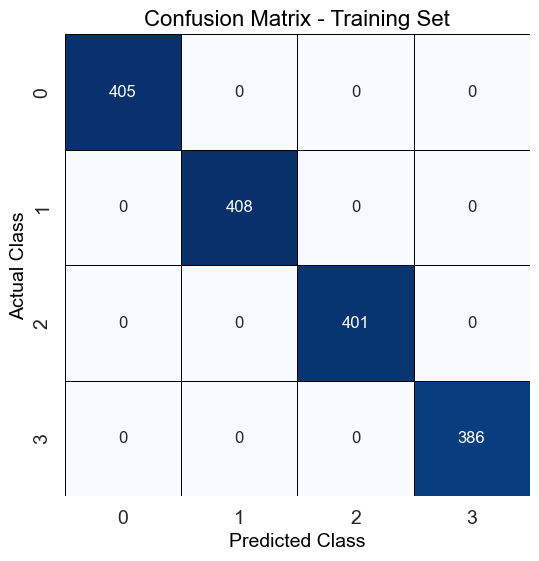

In [35]:
# Confusion matrix for training set
train_conf_matrix2 = confusion_matrix(y_train, y_train_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

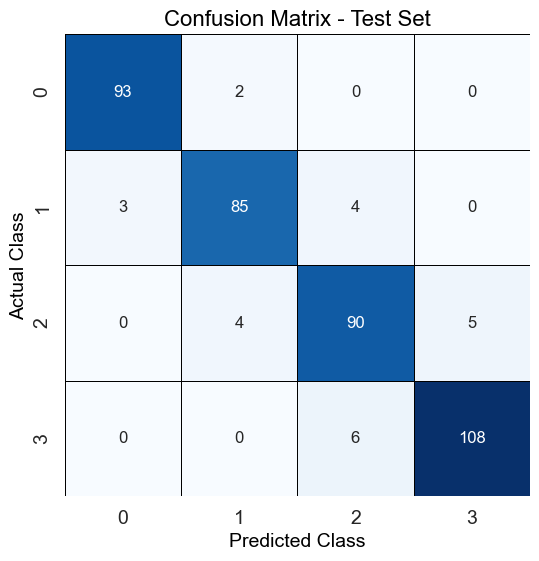

In [36]:
# Confusion matrix for test set
test_conf_matrix2 = confusion_matrix(y_test, y_test_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [37]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts2 = pd.Series(y_train_pred_classes2).value_counts().sort_index()

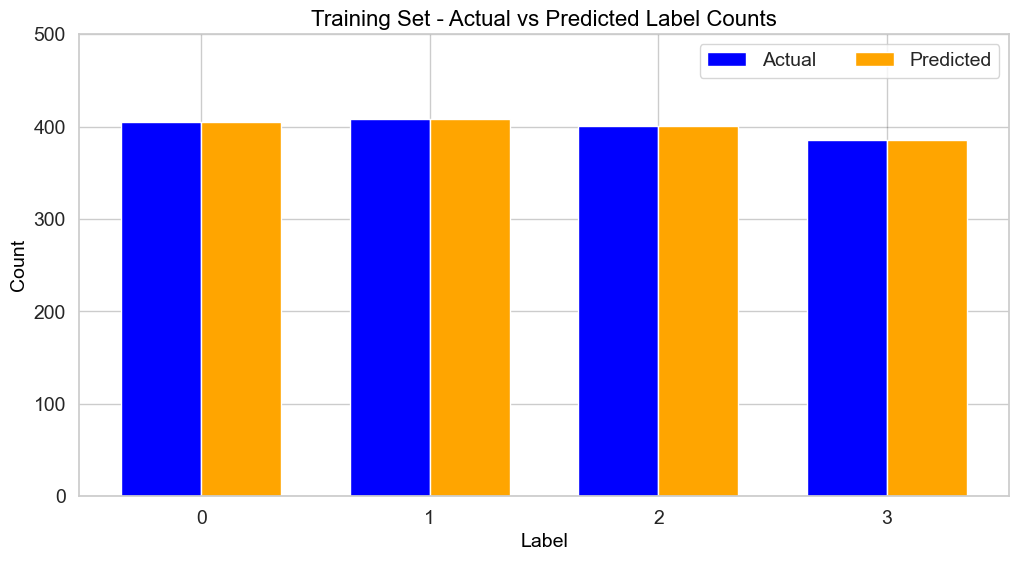

In [38]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

In [39]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts2 = pd.Series(y_test_pred_classes2).value_counts().sort_index()

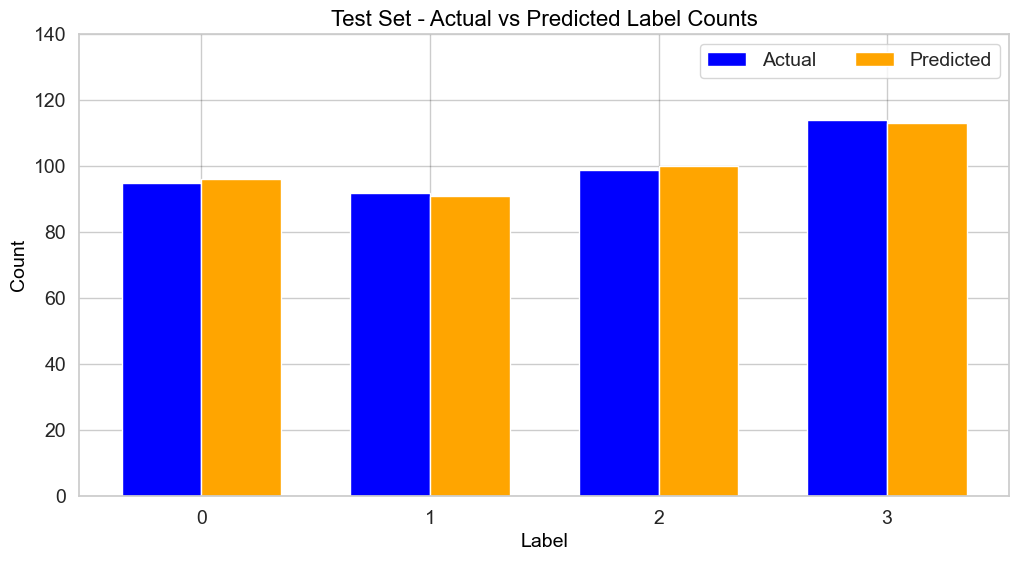

In [40]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

## Sigmoid Activation Function

In [41]:
# Designing the neural network
model3 = Sequential()
model3.add(Input(shape=(X_train.shape[1],)))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(16, activation='sigmoid'))
model3.add(Dense(4, activation='softmax'))

In [42]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2430 - loss: 1.4015 - val_accuracy: 0.3400 - val_loss: 1.3807
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3264 - loss: 1.3779 - val_accuracy: 0.2475 - val_loss: 1.3690
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2761 - loss: 1.3643 - val_accuracy: 0.5325 - val_loss: 1.3411
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4992 - loss: 1.3342 - val_accuracy: 0.6075 - val_loss: 1.2800
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5537 - loss: 1.2586 - val_accuracy: 0.7100 - val_loss: 1.1645
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - loss: 1.1322 - val_accuracy: 0.7225 - val_loss: 1.0108
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.9824 - val_accuracy: 0.7825 - val_loss: 0.8733
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.8586 - val_accuracy: 0.8425 - val_loss: 0.7

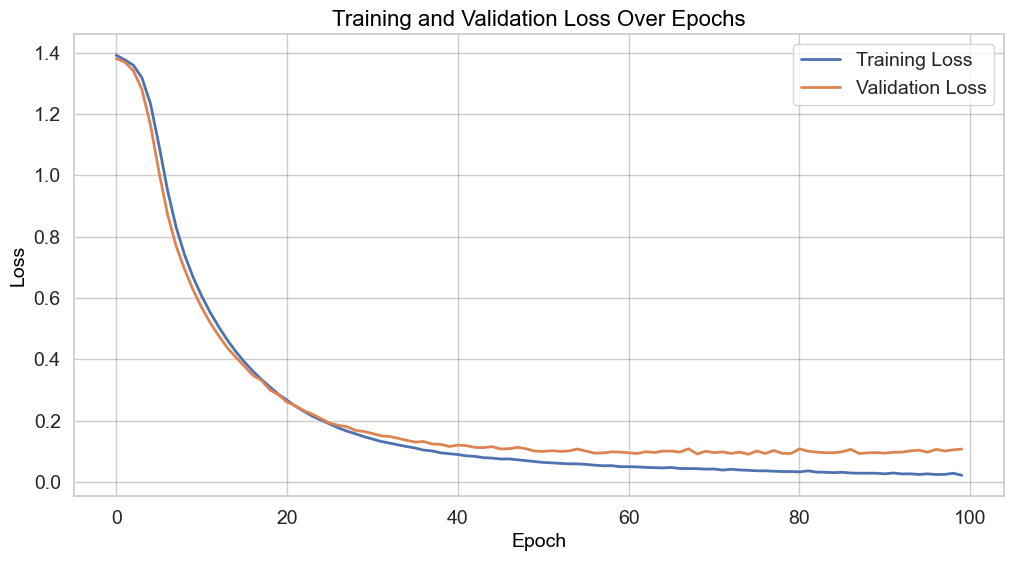

In [43]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

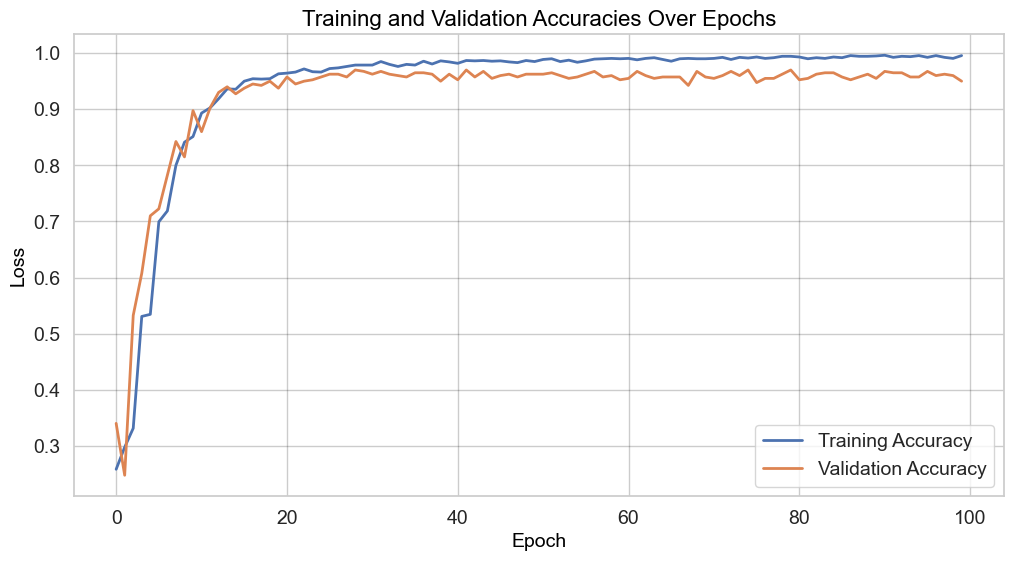

In [44]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [45]:
# Predictions for training and test sets
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [46]:
# Convert predictions to class labels
y_train_pred_classes3 = y_train_pred3.argmax(axis=1)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Training metrics
train_accuracy3 = accuracy_score(y_train, y_train_pred_classes3)
train_precision3 = precision_score(y_train, y_train_pred_classes3, average='macro')
train_recall3 = recall_score(y_train, y_train_pred_classes3, average='macro')
train_f1_3 = f1_score(y_train, y_train_pred_classes3, average='macro')

# Test metrics
test_accuracy3 = accuracy_score(y_test, y_test_pred_classes3)
test_precision3 = precision_score(y_test, y_test_pred_classes3, average='macro')
test_recall3 = recall_score(y_test, y_test_pred_classes3, average='macro')
test_f1_3 = f1_score(y_test, y_test_pred_classes3, average='macro')

In [47]:
print("Training Accuracy (in %):",round(train_accuracy3*100,3))
print("Training Precision (in %):",round(train_precision3*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall3*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1_3*100,3)) # type: ignore
print()
print("Test Accuracy (in %):",round(test_accuracy3*100,3))
print("Test Precision (in %):",round(test_precision3*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall3*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1_3*100,3)) # type: ignore

Training Accuracy (in %): 99.562
Training Precision (in %): 99.568
Training Recall (in %): 99.57
Training F1 Score (in %): 99.568

Test Accuracy (in %): 95.0
Test Precision (in %): 94.967
Test Recall (in %): 94.809
Test F1 Score (in %): 94.872


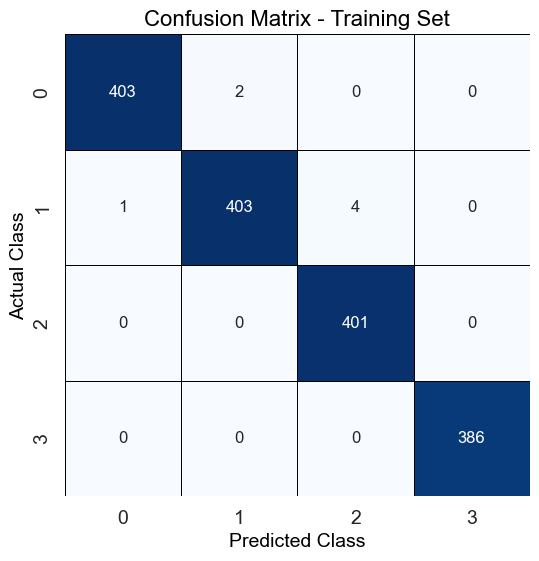

In [48]:
# Confusion matrix for training set
train_conf_matrix3 = confusion_matrix(y_train, y_train_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

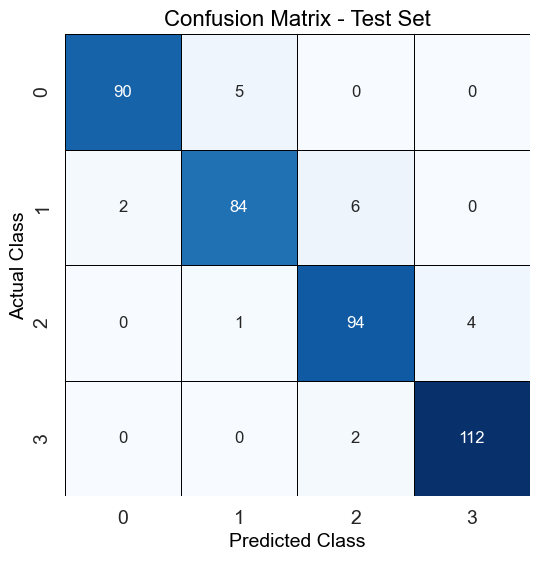

In [49]:
# Confusion matrix for test set
test_conf_matrix3 = confusion_matrix(y_test, y_test_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [50]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts3 = pd.Series(y_train_pred_classes3).value_counts().sort_index()

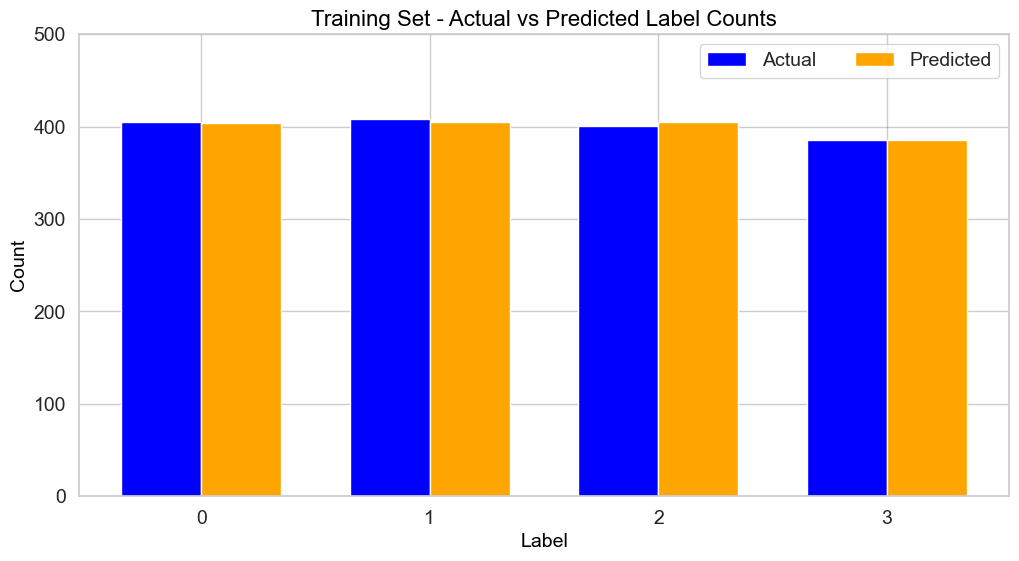

In [51]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

In [52]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts3 = pd.Series(y_test_pred_classes3).value_counts().sort_index()

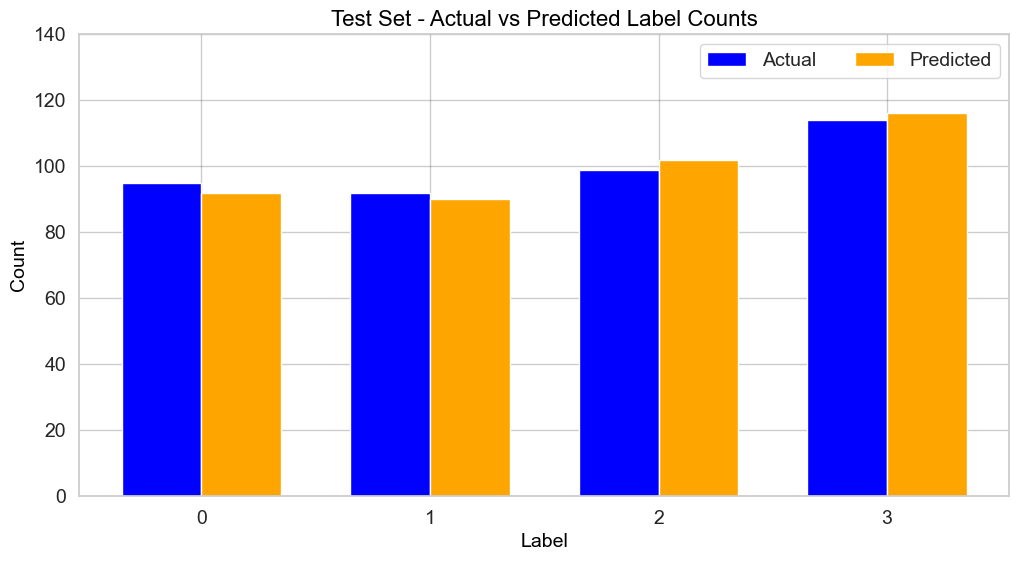

In [53]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

***